<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/7_1_mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 1. 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [2]:
X_test.shape

(10000, 28, 28)

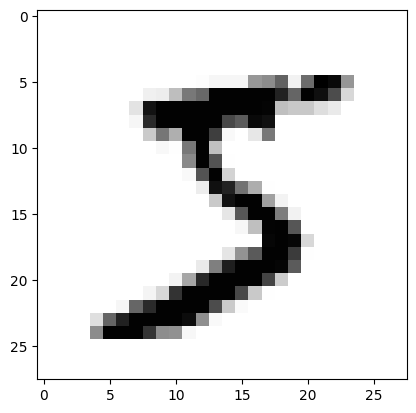

In [3]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

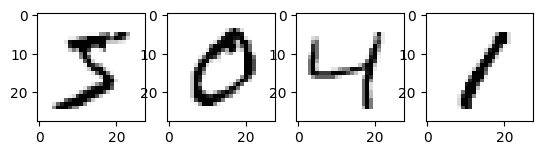

In [5]:
#4개의 이미지를 시각화 하기
fig = plt.figure()
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

ax1.imshow (X_train [0], cmap= 'Greys') #first
ax2.imshow (X_train[1], cmap='Greys') #second
ax3.imshow(X_train[2], cmap='Greys') #third
ax4.imshow(X_train[3], cmap='Greys') #forth

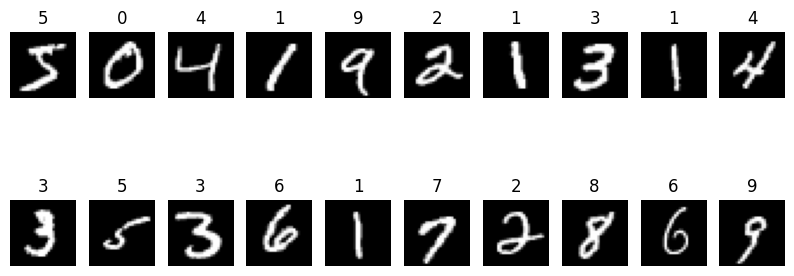

In [18]:

# 처음 20개의 이미지와 레이블을 시각화합니다.
plt.figure(figsize=(10, 4))
for i in range(20):
    plt.subplot(2, 10, i + 1)  # 2행 10열의 그리드에서 i+1번째 위치에 그림을 그립니다.
    plt.imshow(X_train[i], cmap='gray')  # 흑백 색상맵으로 이미지를 보여줍니다.
    plt.title(y_train[i])  # 이미지 위에 해당하는 레이블을 제목으로 표시합니다.
    plt.axis('off')  # 축을 표시하지 않습니다.

# 플롯을 화면에 표시합니다.
plt.show()


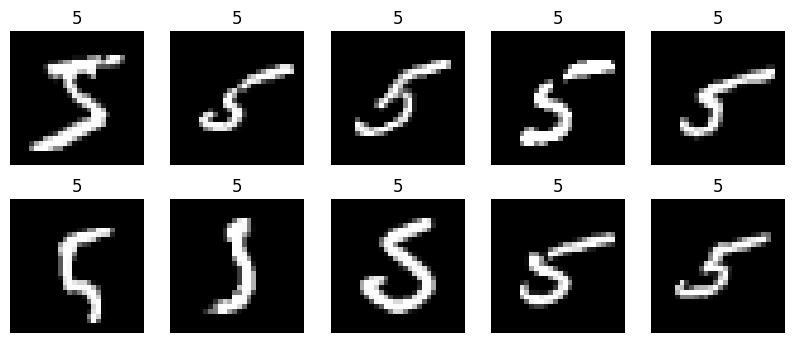

In [19]:


# 클래스가 5인 인덱스를 찾습니다.
indices_of_5 = np.where(y_train == 5)[0]

# 클래스 5에 해당하는 첫 10개의 이미지를 출력합니다.
plt.figure(figsize=(10, 4))
for i, index in enumerate(indices_of_5[:10]):
    plt.subplot(2, 5, i + 1)  # 2행 5열의 그리드에서 i+1번째 위치에 그림을 그립니다.
    plt.imshow(X_train[index], cmap='gray')  # 흑백 색상맵으로 이미지를 보여줍니다.
    plt.title(y_train[index])  # 이미지 위에 해당하는 레이블을 제목으로 표시합니다.
    plt.axis('off')  # 축을 표시하지 않습니다.

# 플롯을 화면에 표시합니다.
plt.show()


In [20]:

# 각 클래스별 개수를 카운트합니다.
class_counts = np.bincount(y_train)

# 클래스별 개수를 출력합니다.
for i, count in enumerate(class_counts):
    print(f"클래스 {i}: {count}개")


클래스 0: 5923개
클래스 1: 6742개
클래스 2: 5958개
클래스 3: 6131개
클래스 4: 5842개
클래스 5: 5421개
클래스 6: 5918개
클래스 7: 6265개
클래스 8: 5851개
클래스 9: 5949개


In [21]:
# 이미지 데이터를 1차원 배열로 평탄화하는 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

#입력값 전처리 : 0~1사이의 값으로 입력데이터를 변환
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])


class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18590, saving model to ./MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18590 to 0.13362, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13362 to 0.11660, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11660 to 0.09851, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss did not improve from 0.09851

Epoch 6: val_loss improved from 0.09851 to 0.08845, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08845 to 0.08232, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08232 to 0.07984, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss did not improve from 0.07984

Epoch 10: val_loss did not improve from 0.07984

Epoch 11: val_loss did not improve from 0.07984

Epoch 12: val_loss improved from 0.07984 to 0.07826, saving model to ./MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.07826

Epoch 14: val_loss did not improve from 0.07826

Epoch 15: val_loss did not improve from 0.07826

Epoch 16: val_loss did not improve from 0.07826

Epoch 

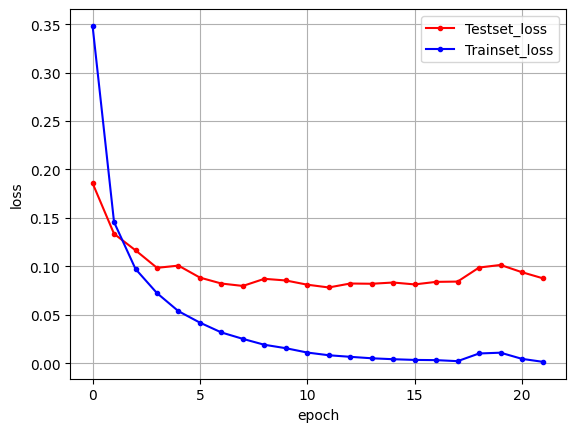

In [9]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##임의의 이미지로 테스트하기

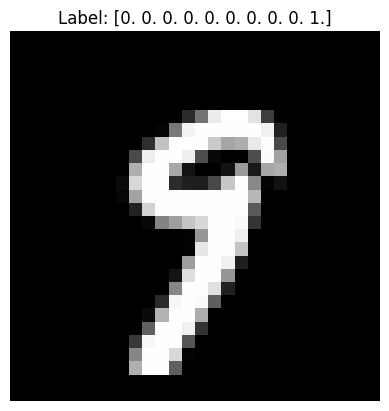

In [10]:
# 테스트 이미지 중에서 무작위로 하나를 선택합니다.
index = np.random.randint(0, len(X_test))
random_image = X_test[index].reshape(28,28)

# 선택한 이미지를 화면에 그립니다.
plt.imshow(random_image, cmap='gray')
plt.title(f"Label: {y_test[index]}")
plt.axis('off')
plt.show()

In [11]:
#이미지의 테스트
random_image = random_image.reshape(1, 784)
prediction = model.predict(random_image)
predicted_label = np.argmax(prediction)

#예측한 결과 값

print("\n 예측한 결과:",predicted_label)

1/1 [==============================] - 0s 80ms/step

 예측한 결과: 9


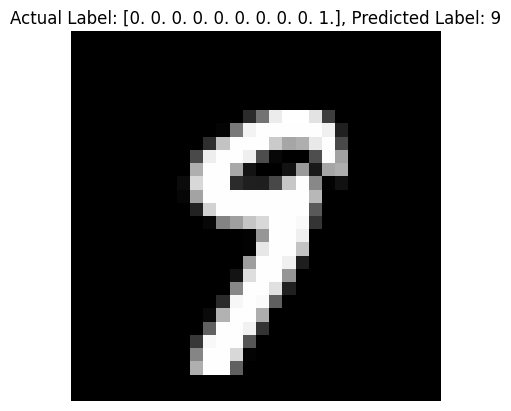

In [12]:
#선택한 이미지와 예측 결과 화면으로 보기

plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual Label: {y_test[index]}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

##내가 쓴 글씨로 테스트하기

1. 먼저 숫자를 그림판에서 쓰고 'mynumber.png'로 저장합니다.
2. 코랩에 업로드 하세요

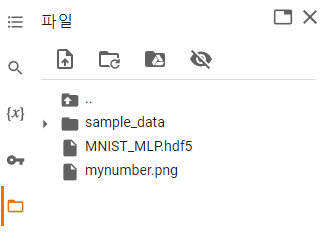

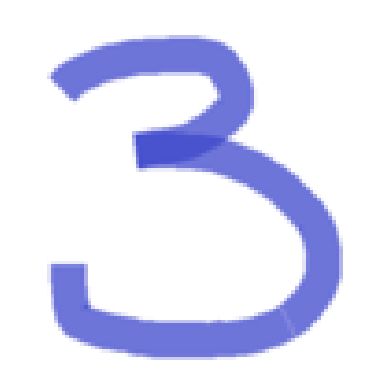

In [22]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 파일 불러오기 및 화면에 표시
img = mpimg.imread('mynumber.png')
plt.imshow(img)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 18ms/step


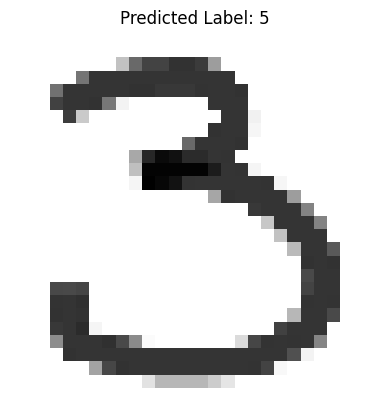

In [23]:
# 이미지 불러오기 및 전처리

from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('mynumber.png', target_size=(28, 28), color_mode='grayscale')
img_array = img_to_array(img)
img_array = img_array.astype('float32') / 255.0
img_array = img_array.reshape(1, 784)

# 모델 예측
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# 결과 표시
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

###왜 틀렸을까?

우리의 이미지와 mnist 데이터의 차이를 찾아보자

In [24]:
# 이미지 데이터 출력
for x in img_array:
    for i in x:
        sys.stdout.write("%-3s" % i)  # [0, 1] 범위의 값을 [0, 255] 범위로 변환
    sys.stdout.write('\n')

1.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.00.847058830.623529430.52941180.52941180.48627450.48627450.509803950.75294121.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.00.6549020.494117650.494117650.494117650.494117650.494117650.494117650.494117650.494117650.494117650.494117650.494117651.01.01.01.01.01.01.01.01.01.01.01.01.01.00.647058840.494117650.494117650.494117650.494117650.494117650.48627450.48627450.50196080.50196080.50196080.490196080.494117650.494117650.48627451.01.01.01.01.01.01.01.01.01.01.01.01.00.52549020.494117650.494117650.48627450.658823550.968627451.01.01.01.01.01.00.494117650.494117650.494117651.01.01.01.01.01.01.01.01.01.01.01.01.01.00.51372550.86666671.01.01.01.01.01.01.01.01.01.00.494117650.494117650.96470591.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.01.00.48627450.494117650.494117650.97647061.01

1/1 [==============================] - 0s 49ms/step


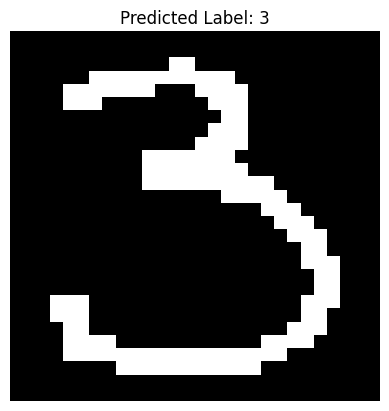

In [25]:
#우리의 데이터를 테스트 데이터와 유사하게  변환하기

# 이미지 불러오기
img = load_img('mynumber.png', target_size=(28, 28), color_mode='grayscale')
img_array = img_to_array(img)
img_array = img_array.astype('float32') / 255.0

# 색상 반전
img_array = np.where(img_array > 0.5, 0, 1)

# 이미지를 모델 입력 형태로 변환
img_array_reshaped = img_array.reshape(1, 784)

# 모델 예측
prediction = model.predict(img_array_reshaped)
predicted_label = np.argmax(prediction)

# 결과 표시
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

## 5. 컨볼루션 신경망 실행하기

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08362, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08362 to 0.05804, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05804 to 0.05131, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05131 to 0.04588, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss did not improve from 0.04588

Epoch 6: val_loss improved from 0.04588 to 0.04481, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04481 to 0.04133, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04133

Epoch 9: val_loss did not improve from 0.04133

Epoch 10: val_loss did not improve from 0.04133

Epoch 11: val_loss did not improve from 0.04133

Epoch 12: val_loss did not improve from 0.04133

Epoch 13: val_loss did not improve from 0.04133

Epoch 14: val_loss did not improve from 0.04133

Epoch 15: val_loss did not improve from 0.04133

Epoch 16: val_loss did not improve from 0.04133



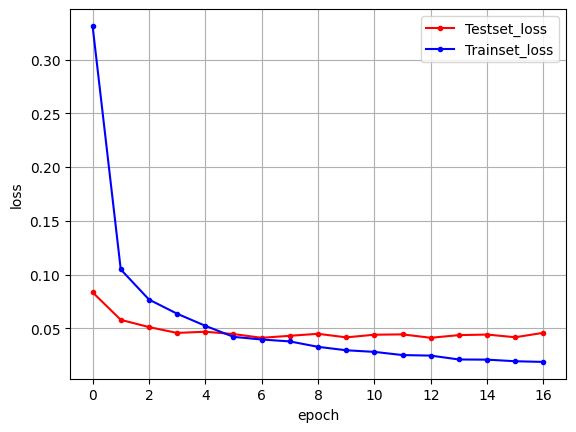

In [27]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#컨볼루션 신경망 모델을 이용한 테스트

1/1 [==============================] - 0s 64ms/step


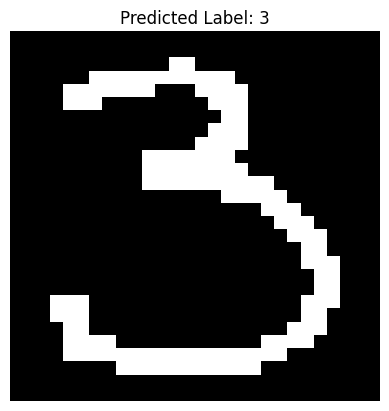

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

# 모델 파일 로드
model = load_model('./MNIST_CNN.hdf5')

# 이미지 불러오기 및 전처리
img = load_img('mynumber.png', target_size=(28, 28), color_mode='grayscale')
img_array = img_to_array(img)
img_array = img_array.reshape(1, 28, 28, 1)  # 모델에 맞는 차원으로 변환
img_array = img_array.astype('float32') / 255.0  # 정규화

# 색상 반전
img_array = np.where(img_array > 0.5, 0, 1)

# 모델 예측
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# 결과 표시
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
